In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from river.datasets import CreditCard
from IncrementalTorch.datasets import Covertype, Shuttle

warnings.filterwarnings('ignore')

## Arranging Tables Benchmark
Taken from https://github.com/himanshudce/DAADS

In [126]:
benchmark_csv = pd.read_csv('../results/Benchmark.csv')
benchmark_csv = benchmark_csv[['dataset','model','PR-AUC','ROC-AUC','runtime']]
benchmark_csv.head()

FileNotFoundError: [Errno 2] No such file or directory: '../results/Benchmark.csv'

In [ ]:
# model sorted list similar to paper
sorter = ['ILOF','HST','RRCF','xStream','Kit-Net','AE','DAE','PW-AE']
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter, range(len(sorter))))

In [ ]:
df = benchmark_csv[benchmark_csv['dataset'] == 'covertype']
df['model_Rank'] = df['model'].map(sorterIndex)
df.sort_values(['model_Rank'],ascending = [True], inplace = True)
df.drop('model_Rank', 1, inplace = True)
df.reset_index(inplace=True,drop=True)
df

,dataset,model,PR-AUC,ROC-AUC,runtime
0,covertype,AE,0.265724,0.955638,166.821647
1,covertype,DAE,0.501184,0.984210,290.957385
2,covertype,PW-AE,0.450871,0.982017,320.041095


In [ ]:
df = benchmark_csv[benchmark_csv['dataset'] == 'creditcard']
df['model_Rank'] = df['model'].map(sorterIndex)
df.sort_values(['model_Rank'],ascending = [True], inplace = True)
df.drop('model_Rank', 1, inplace = True)
df.reset_index(inplace=True,drop=True)
df

,dataset,model,PR-AUC,ROC-AUC,runtime
0,creditcard,AE,0.234189,0.940027,186.723872
1,creditcard,DAE,0.247484,0.943084,267.283816
2,creditcard,PW-AE,0.258441,0.944786,273.085871


## Cherry Picking Check

In [140]:
# Loading the datasets
columns = ['PR-AUC', 'ROC-AUC', 'Max F1', 'Max F1 Precision', 'Max F1 Recall', 'runtime', 'status', 'model', 'subsample', 'preprocessor', 'postprocessor', 'seed', 'lr', 'latent_dim', 'dataset']

benchmark_csv_new_seeds = pd.read_csv('../results/new_seed/Benchmark_raw.csv')
benchmark_csv_old_seeds = pd.read_csv('../results/old_seed/Benchmark_raw.csv')
benchmark_csv_original = pd.read_csv('../results/original/Benchmark_raw.csv')

benchmark_csv_new_seeds = benchmark_csv_new_seeds[columns]
benchmark_csv_old_seeds = benchmark_csv_old_seeds[columns]
benchmark_csv_original = benchmark_csv_original[columns]

# Add an 'Origin' column
benchmark_csv_new_seeds['origin'] = 'new_seeds'
benchmark_csv_old_seeds['origin'] = 'old_seeds'
benchmark_csv_original['origin'] = 'original'

# Concatenate the DataFrames with keys
benchmark_csv_merged = pd.concat([benchmark_csv_original, benchmark_csv_new_seeds, benchmark_csv_old_seeds], keys=['original', 'old_seeds', 'new_seeds'])

# Reset the index
benchmark_csv_merged.reset_index(drop=True, inplace=True)

# print(benchmark_csv_merged)

In [149]:
def box_plot_seed(benchmark_results, target_models, metrics):
    for target_model in target_models:
        # Filter the data for the specific model
        model_data = benchmark_results[benchmark_results['model'] == target_model]

        # Get unique datasets for the target model
        unique_datasets = model_data['dataset'].unique()

        num_metrics = len(metrics)
        num_datasets = len(unique_datasets)

        # Create subplots for each metric and dataset
        _, axs = plt.subplots(num_datasets, num_metrics, figsize=(16, 8), dpi=100, constrained_layout=True)

        for i, metric in enumerate(metrics):
            for j, dataset in enumerate(unique_datasets):
                ax = axs[j, i]
                
                # Filter data for both 'Original' and 'New' origins with the same metric and dataset
                original_data = model_data[(model_data['dataset'] == dataset) & (model_data['origin'] == 'original')]
                old_seeds_data = model_data[(model_data['dataset'] == dataset) & (model_data['origin'] == 'old_seeds')]
                new_seeds_data = model_data[(model_data['dataset'] == dataset) & (model_data['origin'] == 'new_seeds')]

                # Combine data for 'Original' and 'New' origins in the same subplot
                ax.boxplot([original_data[metric], old_seeds_data[metric], new_seeds_data[metric]], labels=['original', 'old_seeds', 'new_seeds'])
                ax.set_ylabel(metric)
                ax.set_title(f'{metric} - {dataset}')

                # Rotate the x-tick labels
                ax.set_xticklabels(['original', 'old_seeds', 'new_seeds'], rotation=45)

        plt.suptitle(f'Distribution of Metrics for {target_model} by Dataset and Metric', fontsize=16)
        plt.tight_layout()

    plt.show()

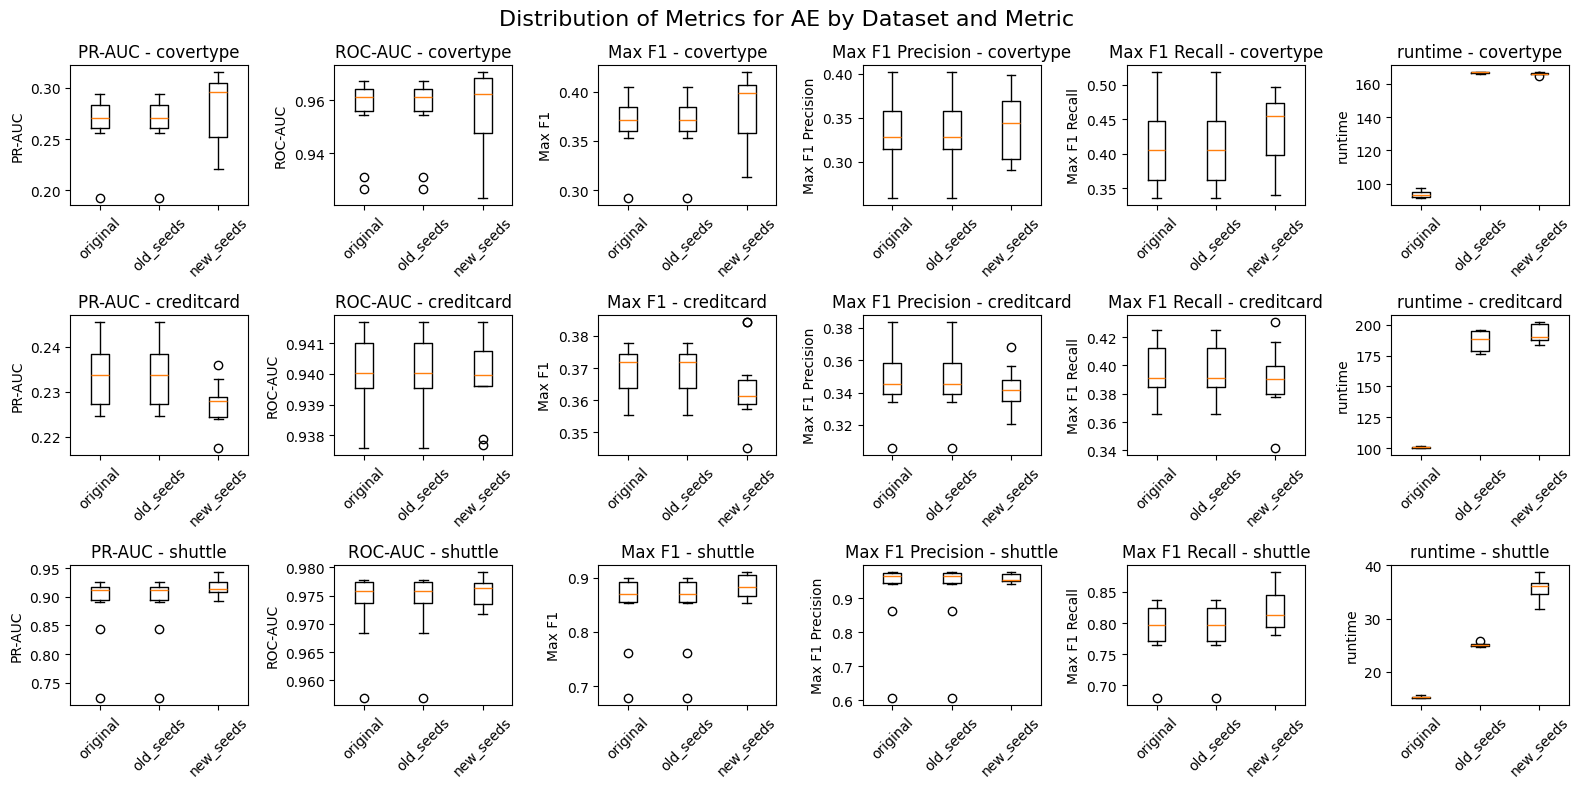

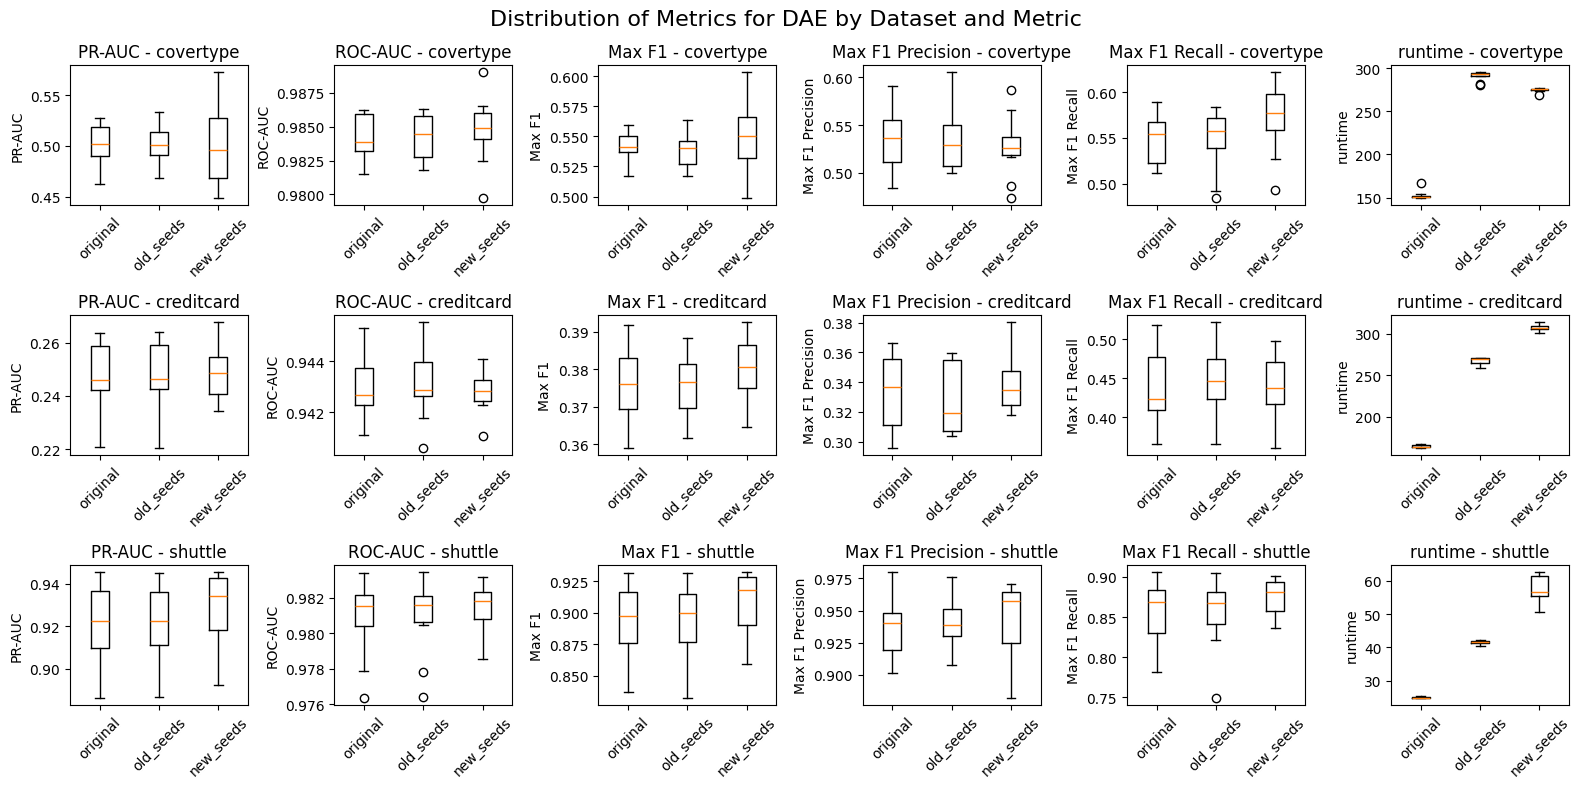

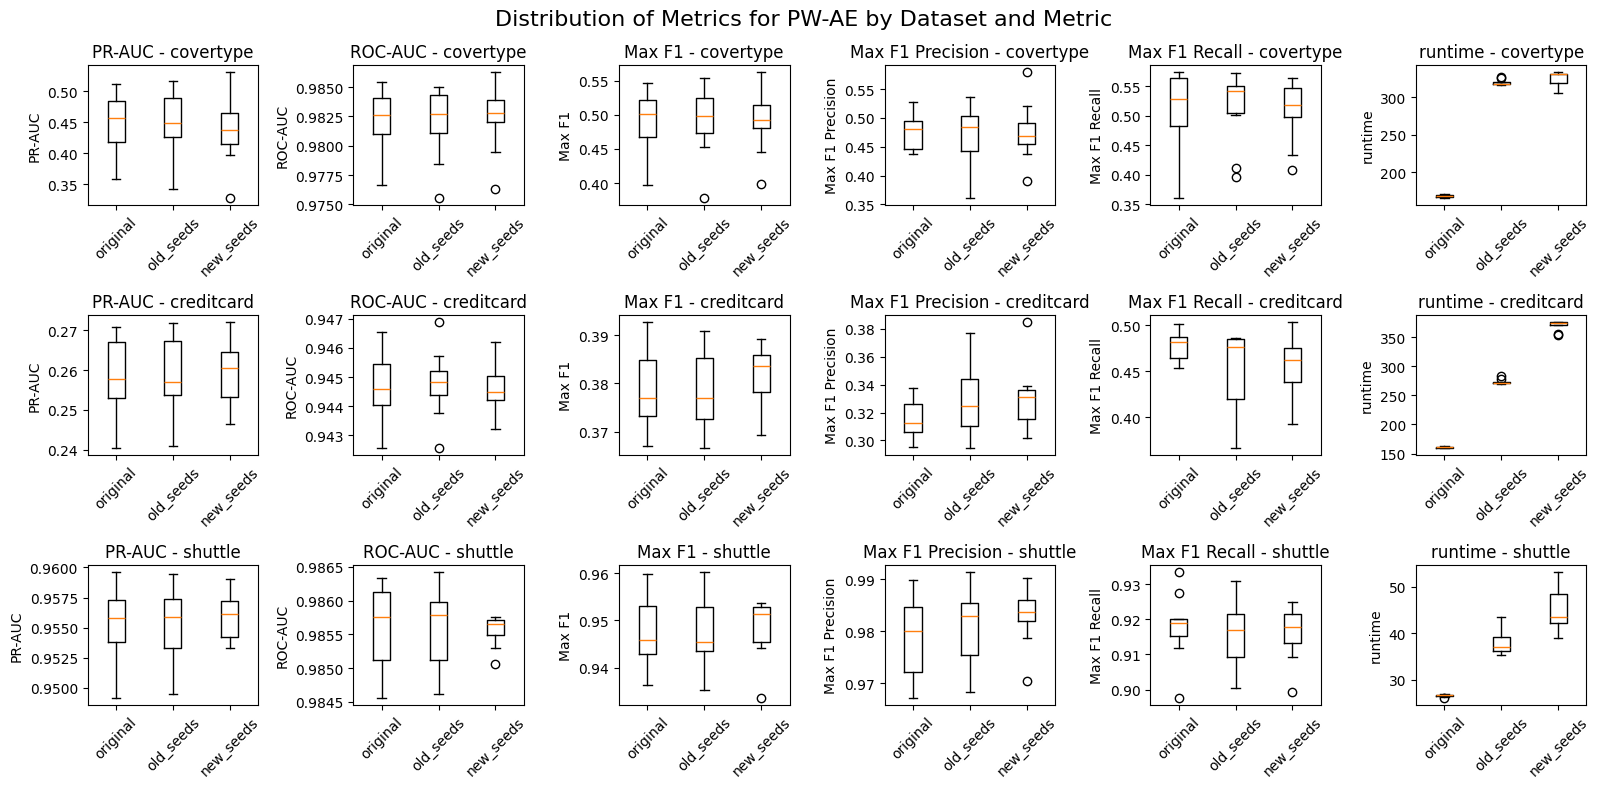

In [150]:
# Specify the model you want to filter by
target_models = ['AE', 'DAE', 'PW-AE']

# Select the list of metrics to plot
metrics = ['PR-AUC', 'ROC-AUC', 'Max F1', 'Max F1 Precision', 'Max F1 Recall', 'runtime']

box_plot_seed(benchmark_results=benchmark_csv_merged, target_models=target_models, metrics=metrics)